In [298]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [299]:
madeiraxls = 'MADEIRAv9b.xlsx'
df_madeira_s3 = pd.read_excel(madeiraxls,sheet_name='MADEIRAv9b')

f_mod = 'D:\\processing\\OTHER_PLATFORMS\\15860000_MOD09Q1_commun_noinf.xls'
df_mod = pd.read_excel(f_mod,sheet_name='MOD09Q1')
df_mod['Date'] = pd.to_datetime(df_mod['Date'], errors='coerce')
df_mod_srtd = df_mod.sort_values(by='Date')

f_myd = 'D:\\processing\\OTHER_PLATFORMS\\15860000_MYD09Q1_commun_noinf.xls'
df_myd = pd.read_excel(f_myd,sheet_name='MYD09Q1')
df_myd['Date'] = pd.to_datetime(df_myd['Date'], errors='coerce')
df_myd_srtd = df_myd.sort_values(by='Date')

f_vir = 'D:\\processing\\OTHER_PLATFORMS\\15860000_VNP09H1_commun_noinf.xls'
df_vir = pd.read_excel(f_vir,sheet_name='Report')
df_vir['Date'] = pd.to_datetime(df_vir['Date'], errors='coerce')
df_vir_srtd = df_vir.sort_values(by='Date')

print('MOD',len(df_mod_srtd))
print('MYD',len(df_myd_srtd))
print('VIIRS',len(df_vir_srtd))

MOD 912
MYD 810
VIIRS 373


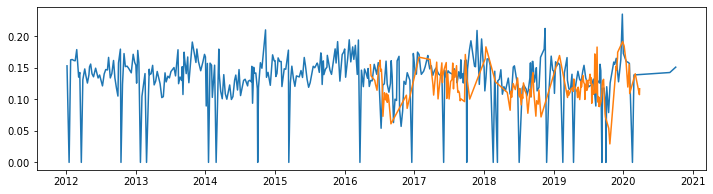

In [300]:
# plt.plot(df_myd_srtd['Date'],df_myd_srtd['Bande rouge estimee']/10000,label='MODIS-Aqua')
# plt.plot(df_mod_srtd['Date'],df_mod_srtd['Bande rouge estimee']/10000,label='MODIS-Terra')
plt.plot(df_vir_srtd['Date'],df_vir_srtd['Bande rouge estimee']/10000,label='VIIRS')
plt.plot(df_madeira_s3['Datetime'],df_madeira_s3['B8-665'])

In [301]:
indexNames = df_mod_srtd[df_mod_srtd['Bande rouge estimee'] == 0].index
df_mod_srtd.drop(indexNames, inplace=True)

indexNames = df_myd_srtd[df_myd_srtd['Bande rouge estimee'] == 0].index
df_myd_srtd.drop(indexNames, inplace=True)

indexNames = df_vir_srtd[df_vir_srtd['Bande rouge estimee'] == 0].index
df_vir_srtd.drop(indexNames, inplace=True)

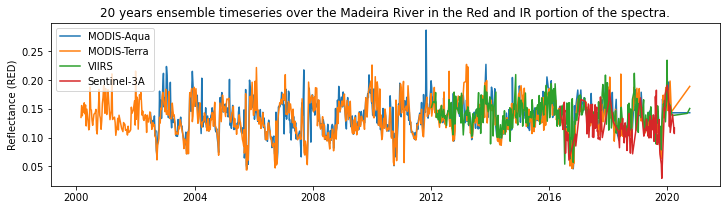

In [302]:
plt.rcParams['figure.figsize'] = [12, 3]
plt.plot(df_myd_srtd['Date'],df_myd_srtd['Bande rouge estimee']/10000,label='MODIS-Aqua')
plt.plot(df_mod_srtd['Date'],df_mod_srtd['Bande rouge estimee']/10000,label='MODIS-Terra')
plt.plot(df_vir_srtd['Date'],df_vir_srtd['Bande rouge estimee']/10000,label='VIIRS')
plt.plot(df_madeira_s3['Datetime'],df_madeira_s3['B8-665'],label='Sentinel-3A')

# plt.plot(df_myd_srtd['Date'],df_myd_srtd['Bande IR estimee']/10000,label='MODIS-Aqua')
# plt.plot(df_mod_srtd['Date'],df_mod_srtd['Bande IR estimee']/10000,label='MODIS-Terra')
# plt.plot(df_vir_srtd['Date'],df_vir_srtd['Bande IR estimee']/10000,label='VIIRS')
# plt.plot(df_madeira_s3['Datetime'],df_madeira_s3['B17-865'],label='Sentinel-3A')


plt.legend()
plt.title('20 years ensemble timeseries over the Madeira River in the Red and IR portion of the spectra.')
plt.ylabel('Reflectance (RED)')
plt.savefig('ensemble_r', dpi=300)

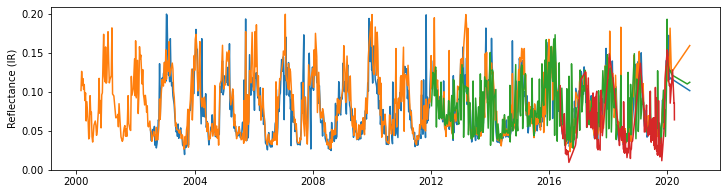

In [303]:
plt.rcParams['figure.figsize'] = [12, 3]
# plt.plot(df_myd_srtd['Date'],df_myd_srtd['Bande rouge estimee']/10000,label='MODIS-Aqua')
# plt.plot(df_mod_srtd['Date'],df_mod_srtd['Bande rouge estimee']/10000,label='MODIS-Terra')
# plt.plot(df_vir_srtd['Date'],df_vir_srtd['Bande rouge estimee']/10000,label='VIIRS')
# plt.plot(df_madeira_s3['Datetime'],df_madeira_s3['B8-665'],label='Sentinel-3A')

plt.plot(df_myd_srtd['Date'],df_myd_srtd['Bande IR estimee']/10000,label='MODIS-Aqua')
plt.plot(df_mod_srtd['Date'],df_mod_srtd['Bande IR estimee']/10000,label='MODIS-Terra')
plt.plot(df_vir_srtd['Date'],df_vir_srtd['Bande IR estimee']/10000,label='VIIRS')
plt.plot(df_madeira_s3['Datetime'],df_madeira_s3['B17-865'],label='Sentinel-3A')


# plt.legend()
# plt.title('20 years ensemble timeseries over the Madeira River in the IR portion of the spectra.')
plt.ylabel('Reflectance (IR)')
plt.savefig('ensemble_ir', dpi=300)

In [304]:
df_madeira_s3['Datetime'].min()

Timestamp('2016-05-14 13:49:52')

In [186]:
aqua = df_myd_srtd[df_myd_srtd['Date'] >= df_madeira_s3['Datetime'].min()]
terra = df_mod_srtd[df_mod_srtd['Date'] >= df_madeira_s3['Datetime'].min()]
viirs = df_vir_srtd[df_vir_srtd['Date'] >= df_madeira_s3['Datetime'].min()]

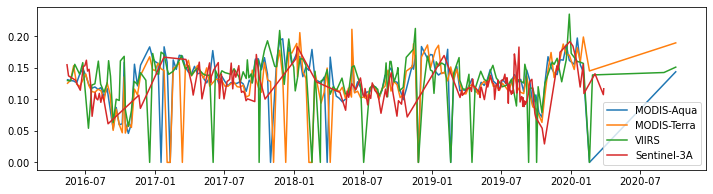

In [188]:
plt.rcParams['figure.figsize'] = [12, 3]
plt.plot(aqua['Date'],aqua['Bande rouge estimee']/10000,label='MODIS-Aqua')
plt.plot(terra['Date'],terra['Bande rouge estimee']/10000,label='MODIS-Terra')
plt.plot(viirs['Date'],viirs['Bande rouge estimee']/10000,label='VIIRS')
plt.plot(df_madeira_s3['Datetime'],df_madeira_s3['B8-665'],label='Sentinel-3A')
plt.legend()
# plt.title('20 years ensemble timeseries over the Madeira River in the Red and IR portion of the spectra.')
# plt.ylabel('Reflectance (RED)')
# plt.savefig('ensemble_r', dpi=300)

In [193]:
df_madeira_s3['Datetime'].min()

Timestamp('2016-05-14 13:49:52')

In [194]:
terra['Date'].min()

Timestamp('2016-05-16 00:00:00')

## DATAFRAME RESAMPLING BY DATE

In [ ]:
# https://stackoverflow.com/questions/49565400/resample-rows-for-missing-dates-and-forward-fill-values-in-all-columns-except-on

In [296]:
# REMOVING DUPLICATED DATES (keep first occurence, discard the others)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
dups = df_mod_srtd.duplicated(subset=['Date'])

dupfree_mod_srtd = df_mod_srtd[~dups].copy()

# print(len(dups), len(df_mod_srtd))

In [297]:
dups2 = df_mod_srtd.duplicated(keep=False,subset=['Date'])
df_mod_srtd[dups2]

,Date,Nom,Bande rouge estimee,Bande IR estimee,ecarttype bande rouge estimee,ecarttype bande IR estimee,reflectance Bande rouge initiale,reflectance Bande IR initiale,taille cluster,vzen,std(vzen),numero scenario,sunglint,pourcentage pixel valides,bande qualite 500m,taille cluster/taillepixelvalide,flag qualite,Unnamed: 17,reason for flag quality <> 1
702,2015-07-04,15860000_mod09q1_a2015185_006.hdf,1330.945946,569.423423,83.114245,61.207609,1299.5864,1030.9891,222,16.660135,21.803253,1,51.556939,28,1,21.915104,1,NaN,NaN
691,2015-07-04,15860000_mod09q1_a2015097_006.hdf,1243.000000,844.500000,31.176915,9.526279,1406.1506,1570.1233,4,52.800000,0.000000,1,39.855462,4,1,2.739726,2,NaN,%validPixels < 5%; vzen > 45°;


In [255]:
# MULTIPLY THE MODIS ROWS X TIMES WHERE X IS DEFINED BY DATES MISSING MEASUREMENTS
rs_terra = dupfree_mod_srtd.set_index('Date').resample('1D').ffill().reset_index()

rs_terra[0:10]

,Date,Nom,Bande rouge estimee,Bande IR estimee,ecarttype bande rouge estimee,ecarttype bande IR estimee,reflectance Bande rouge initiale,reflectance Bande IR initiale,taille cluster,vzen,std(vzen),numero scenario,sunglint,pourcentage pixel valides,bande qualite 500m,taille cluster/taillepixelvalide,flag qualite,Unnamed: 17,reason for flag quality <> 1
0,2000-02-26,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
1,2000-02-27,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
2,2000-02-28,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
3,2000-02-29,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
4,2000-03-01,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
5,2000-03-02,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
6,2000-03-03,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
7,2000-03-04,15860000_mod09q1_a2000057_006.hdf,1353.185950,1016.623967,42.980710,46.686964,1543.5758,1500.8766,242,8.949835,0.091426,1,30.069525,23,1,28.437133,1,NaN,NaN
8,2000-03-05,15860000_mod09q1_a2000065_006.hdf,1560.143836,1262.527397,56.192157,48.449908,1505.7170,1530.9929,146,3.268356,0.548201,1,25.451155,11,1,34.433962,1,NaN,NaN
9,2000-03-06,15860000_mod09q1_a2000065_006.hdf,1560.143836,1262.527397,56.192157,48.449908,1505.7170,1530.9929,146,3.268356,0.548201,1,25.451155,11,1,34.433962,1,NaN,NaN


In [307]:
# REMOVING DAYS OUTSIDE S3 RANGE

# removes hour:minute:seconds from Sentinel-3 data.
df_madeira_s3['Date'] = [e.replace(hour=0, minute=0, second=0) for e in df_madeira_s3['Datetime']]

rs_terra_keep = rs_terra[(rs_terra['Date'] >= df_madeira_s3['Date'].min()) & 
                         (rs_terra['Date'] <= df_madeira_s3['Date'].max())]

print(rs_terra_keep['Date'].min(),rs_terra_keep['Date'].max())

2016-05-14 00:00:00 2020-03-26 00:00:00


In [308]:
print(df_madeira_s3['Date'].min(),df_madeira_s3['Date'].max())

2016-05-14 00:00:00 2020-03-26 00:00:00


In [309]:
len(rs_terra_keep),len(df_madeira_s3)

(1413, 171)

In [310]:
type(df_madeira_s3['Date'])

pandas.core.series.Series

In [282]:
terra_match_s3 = rs_terra_keep[rs_terra_keep['Date'].isin(df_madeira_s3['Date'])]

In [283]:
len(terra_match_s3),len(df_madeira_s3)

(171, 171)

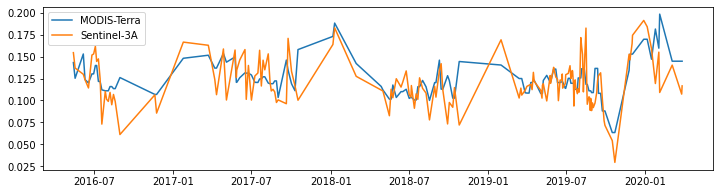

In [284]:
plt.rcParams['figure.figsize'] = [12, 3]
plt.plot(terra_match_s3['Date'],terra_match_s3['Bande rouge estimee']/10000,label='MODIS-Terra')
plt.plot(df_madeira_s3['Date'],df_madeira_s3['B8-665'],label='Sentinel-3A')
plt.legend()

Text(0, 0.5, '(Sentinel-3) B8: 665 nm')

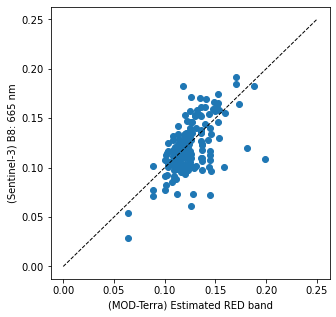

In [287]:
plt.rcParams['figure.figsize'] = [5, 5]

plt.scatter(terra_match_s3['Bande rouge estimee']/10000,df_madeira_s3['B8-665'])
plt.plot([-0.0, 0.25], [-0.0, 0.25], 'k-', linewidth=1, linestyle='dashed')
plt.xlabel('(MOD-Terra) Estimated RED band')
plt.ylabel('(Sentinel-3) B8: 665 nm')


# ax.set_xlim(-0.02, 0.2)
# ax.set_ylim(-0.02, 0.2)
